## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [8]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping

earlystop10 = EarlyStopping(monitor="val_acc", 
                          patience=10, 
                          verbose=1
                          )
earlystop25 = EarlyStopping(monitor="val_acc", 
                          patience=25, 
                          verbose=1
                          )

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[earlystop10]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]
exp_name_tag = "exp-wait-10"
results[exp_name_tag] = {'train_loss': train_loss,
                    'valid_loss': valid_loss,
                    'train_acc': train_acc,
                    'valid_acc': valid_acc}

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[earlystop25]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]
exp_name_tag = "exp-wait-25"
results[exp_name_tag] = {'train_loss': train_loss,
                    'valid_loss': valid_loss,
                    'train_acc': train_acc,
                    'valid_acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
__________

Epoch 6/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.4338 - acc: 0.5001 - val_loss: 1.5699 - val_acc: 0.4483
Epoch 7/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.3964 - acc: 0.5131 - val_loss: 1.5774 - val_acc: 0.4463
Epoch 8/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.3601 - acc: 0.5282 - val_loss: 1.5595 - val_acc: 0.4442
Epoch 9/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.3284 - acc: 0.5394 - val_loss: 1.5243 - val_acc: 0.4631
Epoch 10/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.2970 - acc: 0.5504 - val_loss: 1.4995 - val_acc: 0.4732
Epoch 11/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.2691 - acc: 0.5604 - val_loss: 1.4927 - val_acc: 0.4734
Epoch 12/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.2424 - acc: 0.5699 - val_loss: 1.4797 - val_acc: 0.4827
Epoch 13/50
50000/50000 [======

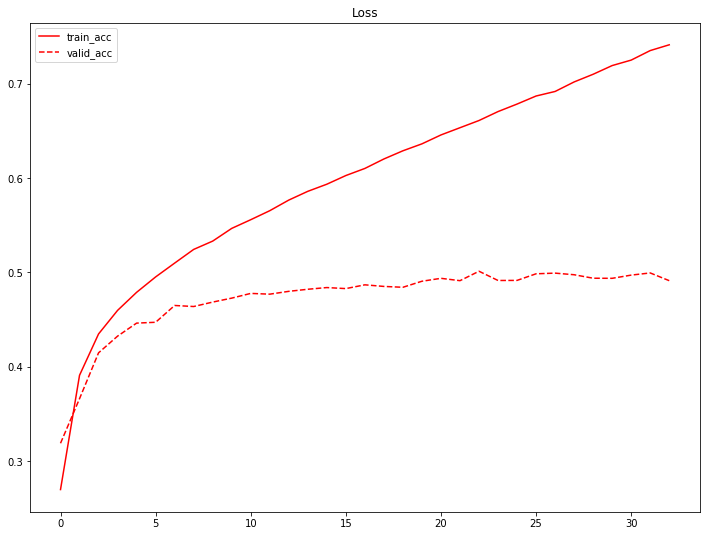

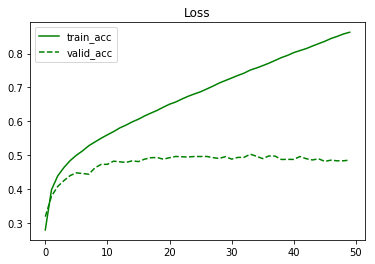

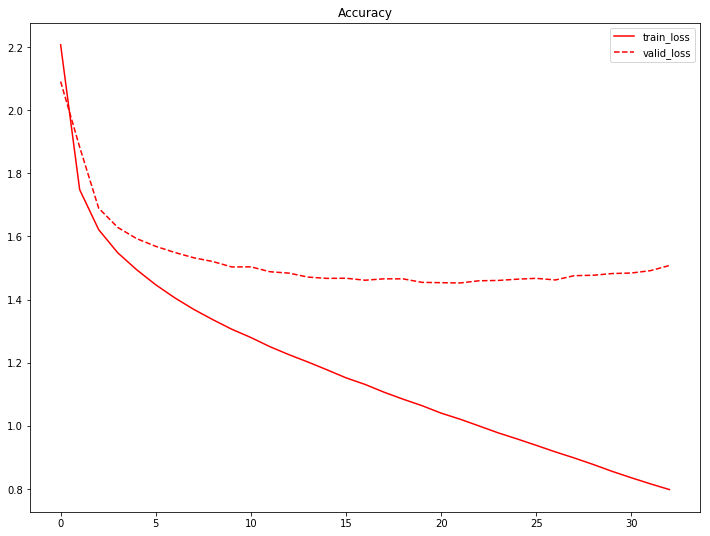

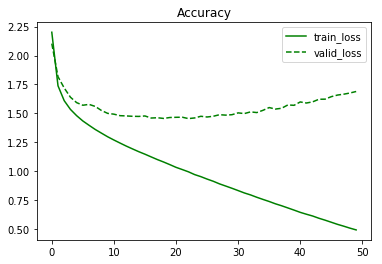

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

max_it = max([len(v['train_acc']) for k, v in results.items()])
plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])), results[cond]['train_acc'], '-', label='train_acc', color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_acc'])), results[cond]['valid_acc'], '--', label='valid_acc', color=color_bar[i])
    plt.title("Loss")
    plt.legend()
    plt.show()

plt.figure(figsize=(12,9))    
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])), results[cond]['train_loss'], '-', label='train_loss', color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])), results[cond]['valid_loss'], '--', label='valid_loss', color=color_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()
